In [2]:
%matplotlib inline

Need to Segment the Image into a Foreground and a blob
http://scikit-image.org/docs/dev/user_guide/tutorial_segmentation.html

/home/schreiverj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


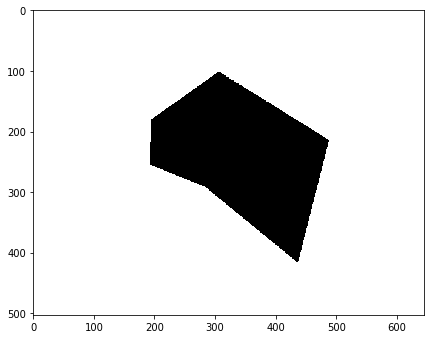

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from scipy import misc

from skimage import feature
from skimage.morphology import watershed

from skimage import data
from skimage.exposure import histogram

img = misc.imread("test.png")

img = rgb2gray(img)
hist, hist_centers = histogram(img)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)



Use Canny Edge Detection


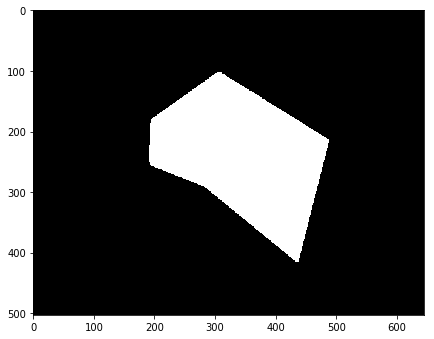

In [6]:
from skimage.feature import canny
from scipy import ndimage as ndi

edges = canny(img)
fill_img = ndi.binary_fill_holes(edges)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(fill_img, cmap=plt.cm.gray)



[0, 645, 503, 0]

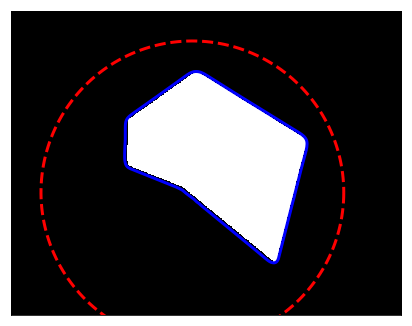

In [6]:
s = np.linspace(0, 2*np.pi, 400)
x = 300+250*np.cos(s)
y = 300+250*np.sin(s)
init = np.array([x, y]).T

snake = active_contour(gaussian(fill_img, 3),
                       init, alpha=.1, w_line=-2, w_edge=5, beta=5, gamma=.01)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(fill_img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])


[0, 645, 503, 0]

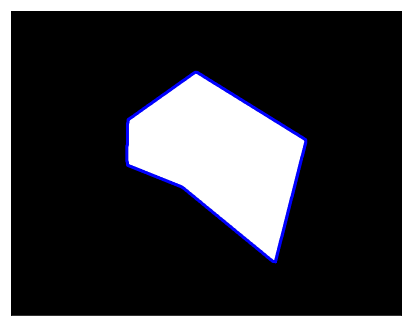

In [7]:
from skimage import measure
s = np.linspace(0, 2*np.pi, 400)
x = 300+250*np.cos(s)
y = 300+250*np.sin(s)
init = np.array([x, y]).T

contours = measure.find_contours(fill_img, 0.8)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(fill_img, cmap=plt.cm.gray)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0] , '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

In [18]:
import sys
sample = open('data.txt', 'w') 
numpy.set_printoptions(threshold=sys.maxsize)

str = np.array2string(contour, formatter={'float_kind':lambda x: "%.2f" % x})
print(str , file = sample)
sample.close()

\n [367.20 376.00]\n [367.00 375.80]\n [366.20 375.00]\n [366.20 374.00]\n [366.00 373.80]\n [365.20 373.00]\n [365.00 372.80]\n [364.20 372.00]\n [364.00 371.80]\n [363.20 371.00]\n [363.00 370.80]\n [362.20 370.00]\n [362.00 369.80]\n [361.20 369.00]\n [361.20 368.00]\n [361.00 367.80]\n [360.20 367.00]\n [360.00 366.80]\n [359.20 366.00]\n [359.00 365.80]\n [358.20 365.00]\n [358.00 364.80]\n [357.20 364.00]\n [357.00 363.80]\n [356.20 363.00]\n [356.20 362.00]\n [356.00 361.80]\n [355.20 361.00]\n [355.00 360.80]\n [354.20 360.00]\n [354.00 359.80]\n [353.20 359.00]\n [353.00 358.80]\n [352.20 358.00]\n [352.20 357.00]\n [352.00 356.80]\n [351.20 356.00]\n [351.00 355.80]\n [350.20 355.00]\n [350.00 354.80]\n [349.20 354.00]\n [349.00 353.80]\n [348.20 353.00]\n [348.00 352.80]\n [347.20 352.00]\n [347.20 351.00]\n [347.00 350.80]\n [346.20 350.00]\n [346.00 349.80]\n [345.20 349.00]\n [345.00 348.80]\n [344.20 348.00]\n [344.00 347.80]\n [343.20 347.00]\n [343.20 346.00]\n [343.00